In [20]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

### 영상 매칭 
https://docs.opencv.org/3.4/dc/dc3/tutorial_py_matcher.html

> process : 검출기 생성(영상 특징 추출) > 매칭기 생성(특징매칭) > 매칭 > 매칭값 후처리

- 검출기 : 불변하는 특징을 추출하는 알고리즘 SIFT(느림),SURF(개선),ORB(+방향,회전)
- 매칭기 : BRFMatcher / FLANN

- keypoints, descriptors = detector.detectAndCompute(image, mask) : 키 포인트 검출
- cv.drawKeypoints(img, keypoints, outImg[,color[,flags]]) : 검출 포인트를 표시

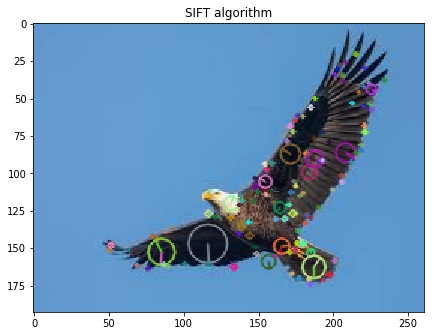

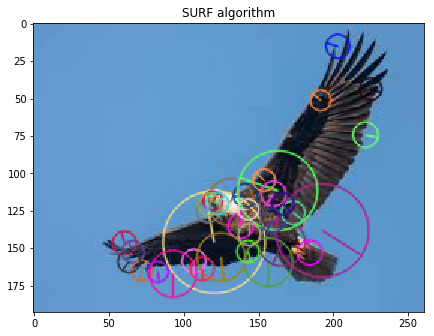

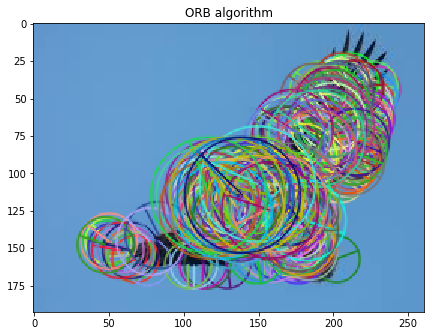

(Text(0.5, 1.0, 'ORB algorithm'), None)

In [21]:
img = cv.imread('img/eagle.jpg')
img_1 = img.copy()
img_2 = img.copy()
img_3 = img.copy()

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# SIFT
sift = cv.xfeatures2d.SIFT_create()
keypoints, descriptor = sift.detectAndCompute(gray, None)
img_1 = cv.drawKeypoints(img_1, keypoints, None,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(7,7)),plt.imshow(cv.cvtColor(img_1, cv.COLOR_BGR2RGB))
plt.title('SIFT algorithm'),plt.show()

# SURF
surf = cv.xfeatures2d.SURF_create(1000, 5, True, True)
keypoints, descriptor = surf.detectAndCompute(gray, None)
img_2 = cv.drawKeypoints(img_2, keypoints, None,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(7,7)),plt.imshow(cv.cvtColor(img_2, cv.COLOR_BGR2RGB))
plt.title('SURF algorithm'),plt.show()

# ORB
orb = cv.ORB_create()
keypoints, descriptor = orb.detectAndCompute(gray, None)
img_3 = cv.drawKeypoints(img_3, keypoints, None,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(7,7)),plt.imshow(cv.cvtColor(img_3, cv.COLOR_BGR2RGB))
plt.title('ORB algorithm'),plt.show()

### BFMatcher

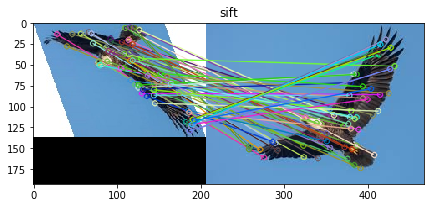

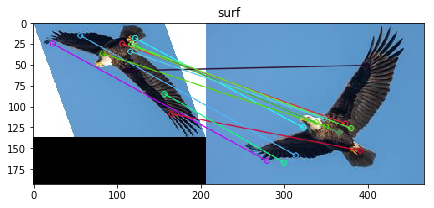

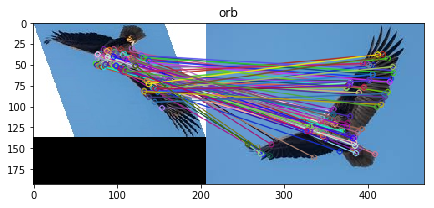

(<Figure size 504x504 with 1 Axes>,
 Text(0.5, 1.0, 'orb'),
 None)

In [22]:
# keypoints, descriptor = orb.detectAndCompute(gray, None)
# img = garden
img_boy = cv.imread('img/eagle2.jpg')
img_garden = cv.imread('img/eagle.jpg')
img_boy1 = img_boy.copy()
img_boy2 = img_boy.copy()
img_boy3 = img_boy.copy()
img_garden1 = img_garden.copy()
img_garden2 = img_garden.copy()
img_garden3 = img_garden.copy()

gray_boy = cv.cvtColor(img_boy, cv.COLOR_BGR2GRAY)
gray_garden = cv.cvtColor(img_garden, cv.COLOR_BGR2GRAY)

# 추출기로 키포인트,기술자(descript) 생성
sift_kp_b, sift_des_b = sift.detectAndCompute(gray_boy, None)
sift_kp_g, sift_des_g = sift.detectAndCompute(img_garden, None)

surf_kp_b, surf_des_b = surf.detectAndCompute(gray_boy, None)
surf_kp_g, surf_des_g = surf.detectAndCompute(img_garden, None)

orb_kp_b, orb_des_b = orb.detectAndCompute(gray_boy, None)
orb_kp_g, orb_des_g = orb.detectAndCompute(img_garden, None)

############## BFMatcher ##################
matcher = cv.BFMatcher(cv.NORM_L1, crossCheck=True)
matcher_L2 = cv.BFMatcher(cv.NORM_L2, crossCheck=True)
matcher_Hamming = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# 매칭 계산
# sift_matche에는 두 이미지의 키값들이 들어있는데,
# 그 키값들의 유사도를 측정, 그 유사도가 클수록, 매칭의값이 작을수록 두 특징점은
# 비슷한 특징이다.

sift_matche = matcher.match(sift_des_b, sift_des_g)
surf_matche = matcher_L2.match(surf_des_b, surf_des_g)
orb_matche = matcher_Hamming.match(orb_des_b, orb_des_g)

# 매칭 결과 그리기
sift_res = cv.drawMatches(img_boy1, sift_kp_b, img_garden1, sift_kp_g, sift_matche, None, \
                      flags=cv.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

surf_matche = cv.drawMatches(img_boy2, surf_kp_b, img_garden2, surf_kp_g, surf_matche, None, \
                      flags=cv.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

orb_matche = cv.drawMatches(img_boy3, orb_kp_b, img_garden3, orb_kp_g, orb_matche, None, \
                      flags=cv.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

# 결과 출력 
plt.figure(figsize=(7,7)),plt.imshow(cv.cvtColor(sift_res, cv.COLOR_BGR2RGB)),plt.title('sift'),plt.show()
plt.figure(figsize=(7,7)),plt.imshow(cv.cvtColor(surf_matche, cv.COLOR_BGR2RGB)),plt.title('surf'),plt.show()
plt.figure(figsize=(7,7)),plt.imshow(cv.cvtColor(orb_matche, cv.COLOR_BGR2RGB)),plt.title('orb'),plt.show()

### FLANNMatcher

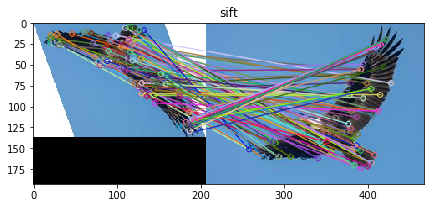

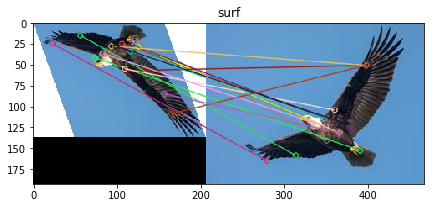

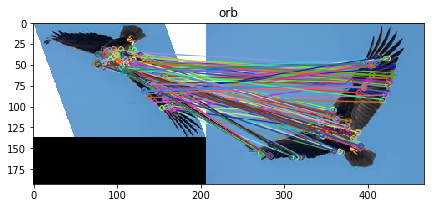

(<Figure size 504x504 with 1 Axes>,
 Text(0.5, 1.0, 'orb'),
 None)

In [23]:
# keypoints, descriptor = orb.detectAndCompute(gray, None)
# img = garden
img_boy = cv.imread('img/eagle2.jpg')
img_garden = cv.imread('img/eagle.jpg')
img_boy1 = img_boy.copy()
img_boy2 = img_boy.copy()
img_boy3 = img_boy.copy()
img_garden1 = img_garden.copy()
img_garden2 = img_garden.copy()
img_garden3 = img_garden.copy()

gray_boy = cv.cvtColor(img_boy, cv.COLOR_BGR2GRAY)
gray_garden = cv.cvtColor(img_garden, cv.COLOR_BGR2GRAY)

# 추출기로 키포인트,기술자(descript) 생성
sift_kp_b, sift_des_b = sift.detectAndCompute(gray_boy, None)
sift_kp_g, sift_des_g = sift.detectAndCompute(img_garden, None)

surf_kp_b, surf_des_b = surf.detectAndCompute(gray_boy, None)
surf_kp_g, surf_des_g = surf.detectAndCompute(img_garden, None)

orb_kp_b, orb_des_b = orb.detectAndCompute(gray_boy, None)
orb_kp_g, orb_des_g = orb.detectAndCompute(img_garden, None)

########## FLANNMathcer ##########
# surf+sift 인덱스 파라미터와 검색 파라미터 설정
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50) # 검색 파라미터 , 딕셔너리 객체(checks = 검색할 후보수)
matcher_s = cv.FlannBasedMatcher(index_params, search_params)
#################################
# ORB 인덱스 파라미터 설정 
FLANN_INDEX_LSH_ = 6
index_params_= dict(algorithm = FLANN_INDEX_LSH_,
                   table_number = 6,
                   key_size = 12,
                   multi_probe_level = 1)
search_params_=dict(checks=32) # 검색 파라미터 , 딕셔너리 객체(checks = 검색할 후보수)
matcher_orb = cv.FlannBasedMatcher(index_params_, search_params_)
#################################

# 매칭 계산
sift_matche = matcher_s.match(sift_des_b, sift_des_g)
surf_matche = matcher_s.match(surf_des_b, surf_des_g)
orb_matche = matcher_orb.match(orb_des_b, orb_des_g)

# 매칭 결과 그리기
sift_res = cv.drawMatches(img_boy1, sift_kp_b, img_garden1, sift_kp_g, sift_matche, None, \
                      flags=cv.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

surf_matche = cv.drawMatches(img_boy2, surf_kp_b, img_garden2, surf_kp_g, surf_matche, None, \
                      flags=cv.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

orb_matche = cv.drawMatches(img_boy3, orb_kp_b, img_garden3, orb_kp_g, orb_matche, None, \
                      flags=cv.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

# 결과 출력 
plt.figure(figsize=(7,7)),plt.imshow(cv.cvtColor(sift_res, cv.COLOR_BGR2RGB)),plt.title('sift'),plt.show()
plt.figure(figsize=(7,7)),plt.imshow(cv.cvtColor(surf_matche, cv.COLOR_BGR2RGB)),plt.title('surf'),plt.show()
plt.figure(figsize=(7,7)),plt.imshow(cv.cvtColor(orb_matche, cv.COLOR_BGR2RGB)),plt.title('orb'),plt.show()

### 좋은 특징점, 매칭하는점 찾기 (KnnMatch)

matches:3/110, min:29.00, max:92.00, thresh:41.60


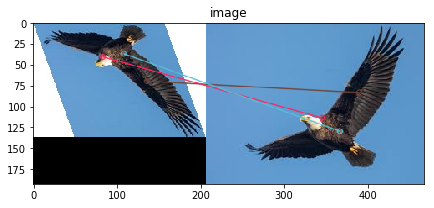

(<Figure size 504x504 with 1 Axes>,
 Text(0.5, 1.0, 'image'),
 None)

In [24]:
img1 = cv.imread('img/eagle2.jpg')
img2 = cv.imread('img/eagle.jpg')
gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

# ORB
detector = cv.ORB_create()
kp1, desc1 = detector.detectAndCompute(gray1, None)
kp2, desc2 = detector.detectAndCompute(gray2, None)
# BFmatching/HAMMING
matcher = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
matches = matcher.match(desc1, desc2)

# 매치값들 오름차순으로 정렬
matches = sorted(matches, key=lambda x:x.distance)

# 최소 거리 값과 최대 거리 값
min_dist, max_dist = matches[0].distance, matches[-1].distance
# 임계점 설정
ratio = 0.2
good_thresh = (max_dist - min_dist) * ratio + min_dist

# 임계점 보다 작은 매칭점만 좋은 매칭점으로 분류
# m.distance = 유사도거리
# m.queryIdx / trainIdx / imgIdx / distance
good_matches = [m for m in matches if m.distance < good_thresh]
# good_matches = []
# for m in matches:
#     if m.distance < good_thresh:
#         good_matches.append(m)

print('matches:%d/%d, min:%.2f, max:%.2f, thresh:%.2f' \
        %(len(good_matches),len(matches), min_dist, max_dist, good_thresh))
# 좋은 매칭점만 그리기 ---⑦
res = cv.drawMatches(img1, kp1, img2, kp2, good_matches, None, \
                flags=cv.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
# 결과 출력                    
plt.figure(figsize=(7,7)),plt.imshow(cv.cvtColor(res, cv.COLOR_BGR2RGB)),plt.title('image'),plt.show()